In [1]:
from osgeo import osr, ogr, gdal
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np 
import pandas as pd 
import geopandas as gpd
import rasterio
from sklearn.model_selection import train_test_split
import geopandas as gpd
from rasterio.plot import show
from geohelpers import collocate, getCoords
from osgeo import osr, ogr, gdal
import pyproj
from pyproj import Proj, transform
import geopandas as gpd
import numpy as np
import rasterio
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
import math
import datetime
import geopandas as gpd
import warnings
from sklearn.preprocessing import QuantileTransformer
warnings. filterwarnings('ignore')

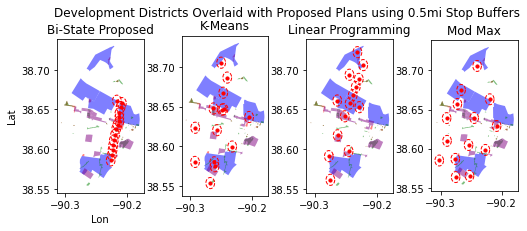

In [30]:
file_paths = [
    "districts/TDD.shp",
    "districts/NRSA.shp",
    "districts/CID.shp",
    "districts/SBD.shp"
]

dists = [gpd.read_file(file, crs='EPSG:4326') for file in file_paths]
colors = ['red', 'blue', 'green', 'purple']
dist_names = ['TDD', 'NRSA', 'CID', 'SBD']  # Assuming you have the plan names defined somewhere
shapefile_paths = [r"plans\OrigStops.shp",r"plans\KMeansStops.shp",r"plans\LPStops.shp",r"plans\MMStops.shp"]
plan_names = ['Bi-State Proposed', 'K-Means','Linear Programming','Mod Max']

lat_deg_to_mi = 69  # Approximation for latitude conversion from degrees to miles
lon_deg_to_mi = 69  
r = 0.007

id = 0
data = []  # List to store data for each district and plan

for id, plan_name in enumerate(plan_names):
    for dist, name in zip(dists, dist_names):
        total_area_deg = dist.area.sum()  
        total_area_mi = total_area_deg * lat_deg_to_mi * lon_deg_to_mi  
        
        stops = gpd.read_file(shapefile_paths[id])
        stops = stops.to_crs("EPSG:4326")
        stops_buffer = stops.buffer(r)  
        stops_buffer_df = gpd.GeoDataFrame(geometry=stops_buffer) 
        
        overlap = gpd.overlay(dist, stops_buffer_df, how='intersection') 
        overlap_area_mi = overlap.area.sum() * lat_deg_to_mi * lon_deg_to_mi 
        
        not_covered_area_mi = total_area_mi - overlap_area_mi  

        
        data.append({'District': name,
                     'Plan Name': plan_name,
                     'Total Area (mi)': total_area_mi,
                     'Overlap Area (mi)': overlap_area_mi,
                     'Uncovered Area (mi)': not_covered_area_mi})

zonalStats_dists = pd.DataFrame(data)
sum_row = pd.Series(zonalStats_dists.sum(numeric_only=True), name='Total')
#zonalStats_dists = zonalStats_dists.append(sum_row)
zonalStats_dists = pd.concat([zonalStats_dists, pd.DataFrame([sum_row])], ignore_index=True)

plan_totals = zonalStats_dists.groupby('Plan Name').sum()

######################################################################plot!
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

name = 0
for ax in axs.flat:
    stops = gpd.read_file(shapefile_paths[name])
    stops = stops.to_crs("EPSG:4326")
    col = 0
    for dist in dists:
        dist.plot(ax=ax, color=colors[col], alpha=0.5, label=dist_names[col])
        col += 1

    stops_buffer = stops.buffer(r)
    stops_buffer.plot(ax=ax, edgecolor='red', facecolor='none', linestyle='--')
    stops.plot(ax=ax, markersize=10, color='red', marker='o', label='Stops')
    ax.set_title(plan_names[name])
    name += 1
    if name == 1:
        ax.set_xlabel('Lon')
        ax.set_ylabel('Lat')
fig.suptitle(f'Development Districts Overlaid with Proposed Plans using 0.5mi Stop Buffers')
plt.tight_layout()
plt.subplots_adjust(left=0.18, right=0.82, top=1.2, bottom=0)
plt.savefig('outputs\OverlayDists.png')

plt.show()

In [3]:
plan_totals['Percent Covered Land'] = (plan_totals['Overlap Area (mi)'] / plan_totals['Total Area (mi)']) * 100
plan_totals = plan_totals.drop(columns = ['Total Area (mi)'])
plan_totals = plan_totals.drop(columns = ['District'])
plan_totals.head()

,Overlap Area (mi),Uncovered Area (mi),Percent Covered Land
Plan Name,,,
Bi-State Proposed,3.712236,20.564211,15.291513
K-Means,4.981441,19.295006,20.519647
Linear Programming,4.212217,20.064230,17.351045
Mod Max,2.421634,21.854813,9.975239


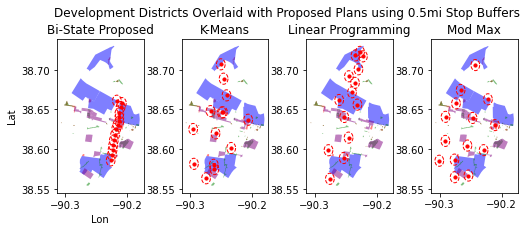

In [31]:
file_paths = [
    "districts/TDD.shp",
    "districts/NRSA.shp",
    "districts/CID.shp",
    "districts/SBD.shp"
]

dists = [gpd.read_file(file, crs='EPSG:4326') for file in file_paths]
colors = ['red', 'blue', 'green', 'purple']
dist_names = ['TDD', 'NRSA', 'CID', 'SBD']  # Assuming you have the plan names defined somewhere
shapefile_paths = [r"plans\OrigStops_p.shp",r"plans\KMeansStops_p.shp",r"plans\LPStops_p.shp",r"plans\MMStops_p.shp"]
plan_names = ['Bi-State Proposed', 'K-Means','Linear Programming','Mod Max']

lat_deg_to_mi = 69  # Approximation for latitude conversion from degrees to miles
lon_deg_to_mi = 69  
r = 0.007

id = 0
data = []  # List to store data for each district and plan

for id, plan_name in enumerate(plan_names):
    for dist, name in zip(dists, dist_names):
        total_area_deg = dist.area.sum()  
        total_area_mi = total_area_deg * lat_deg_to_mi * lon_deg_to_mi  
        
        stops = gpd.read_file(shapefile_paths[id])
        stops = stops.to_crs("EPSG:4326")
        stops_buffer = stops.buffer(r)  
        stops_buffer_df = gpd.GeoDataFrame(geometry=stops_buffer) 
        
        overlap = gpd.overlay(dist, stops_buffer_df, how='intersection') 
        overlap_area_mi = overlap.area.sum() * lat_deg_to_mi * lon_deg_to_mi 
        
        not_covered_area_mi = total_area_mi - overlap_area_mi  

        
        data.append({'District': name,
                     'Plan Name': plan_name,
                     'Total Area (mi)': total_area_mi,
                     'Overlap Area (mi)': overlap_area_mi,
                     'Uncovered Area (mi)': not_covered_area_mi})

zonalStats_dists = pd.DataFrame(data)
sum_row = pd.Series(zonalStats_dists.sum(numeric_only=True), name='Total')
zonalStats_dists = pd.concat([zonalStats_dists, pd.DataFrame([sum_row])], ignore_index=True)
plan_totals = zonalStats_dists.groupby('Plan Name').sum()

######################################################################plot!
fig, axs = plt.subplots(1, 4, figsize=(10, 4))

name = 0
for ax in axs.flat:
    stops = gpd.read_file(shapefile_paths[name])
    stops = stops.to_crs("EPSG:4326")
    col = 0
    for dist in dists:
        dist.plot(ax=ax, color=colors[col], alpha=0.5, label=dist_names[col])
        col += 1

    stops_buffer = stops.buffer(r)
    stops_buffer.plot(ax=ax, edgecolor='red', facecolor='none', linestyle='--')
    stops.plot(ax=ax, markersize=10, color='red', marker='o', label='Stops')
    ax.set_title(plan_names[name])
    name += 1
    if name == 1:
        ax.set_xlabel('Lon')
        ax.set_ylabel('Lat')
fig.suptitle(f'Development Districts Overlaid with Proposed Plans using 0.5mi Stop Buffers')
plt.tight_layout()
plt.subplots_adjust(left=0.18, right=0.82, top=1.2, bottom=0)
plt.savefig('outputs\OverlayDists_pop.png')

plt.show()

In [17]:
#plan_totals = plan_totals.drop(columns = 'Total Area (mi)')
plan_totals['Percent Covered Land'] = (plan_totals['Overlap Area (mi)'] / plan_totals['Total Area (mi)']) * 100
plan_totals = plan_totals.drop(columns = ['Total Area (mi)'])
plan_totals = plan_totals.drop(columns = ['District'])

plan_totals.head()
#display(zonalStats_dists)

,Overlap Area (mi),Uncovered Area (mi),Percent Covered Land
Plan Name,,,
Bi-State Proposed,3.712236,20.564211,15.291513
K-Means,4.798836,19.477611,19.767455
Linear Programming,4.091528,20.184919,16.853899
Mod Max,2.831973,21.444474,11.665519
